<a href="https://colab.research.google.com/github/prp20/tensorflow_learning/blob/main/Fashion_MNiST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Get Data from Keras
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# See the shapes of the data
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
class_names = ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
def plot_loss_curves(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [6]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 15), text_size=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize it
  n_classes = cm.shape[0]  # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)  # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
      labels = classes
  else:
      labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(n_classes),  # create enough axis slots for each class
          yticks=np.arange(n_classes),
          xticklabels=labels,  # axes will labeled with class names (if they exist) or ints
          yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)
  plt.show()

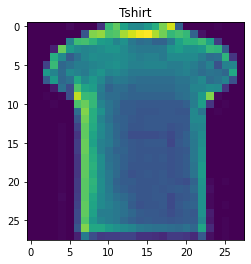

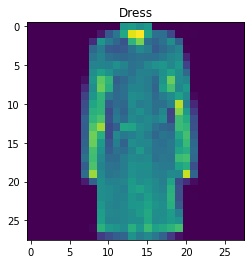

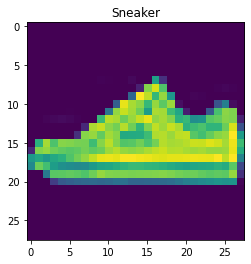

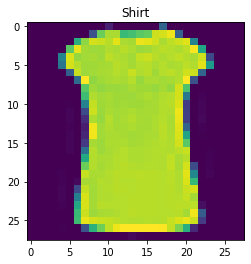

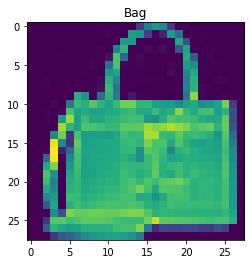

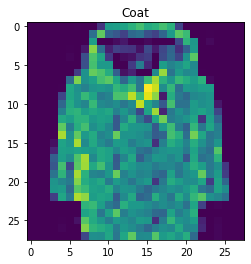

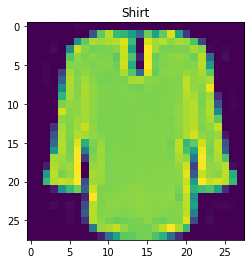

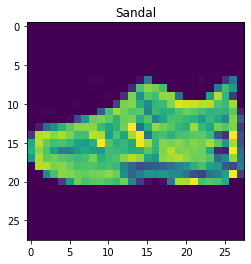

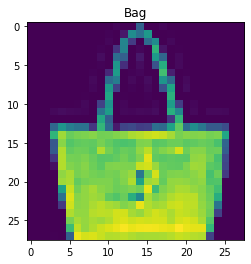

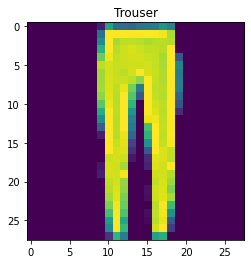

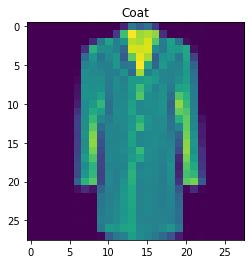

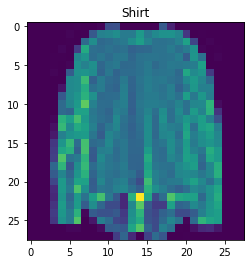

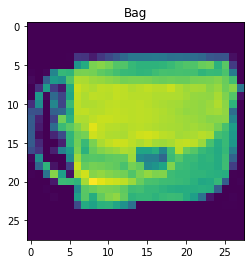

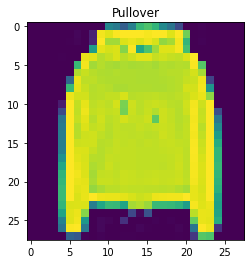

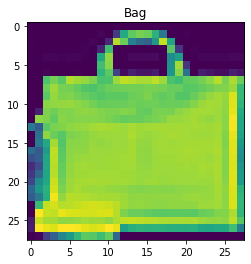

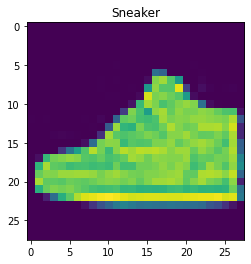

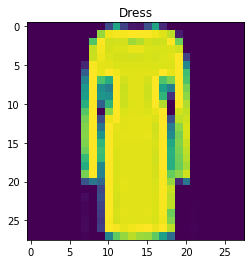

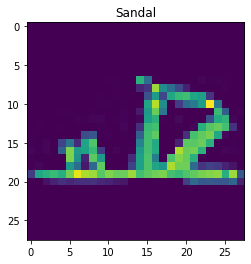

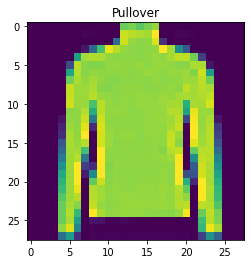

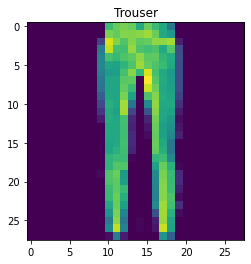

In [7]:
# Visualise Random Data
def display_number(img, lbl):
    plt.imshow(img)
    plt.title(class_names[lbl])
    plt.show()

for i in range(20):
    val = random.randint(0, len(train_labels))
    image = train_data[val]
    display_number(image, train_labels[val])

In [8]:
# Basic Model
# set random seed
tf.random.set_seed(42)
    
# Define model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name="fashion_mnist_model_1")

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data, train_labels, epochs=10,
                        validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 2ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

313/313 [==============================] - 1s 3ms/step - loss: 1.5488 - accuracy: 0.3410


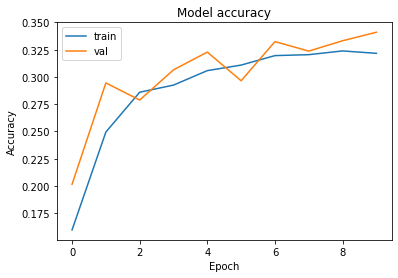

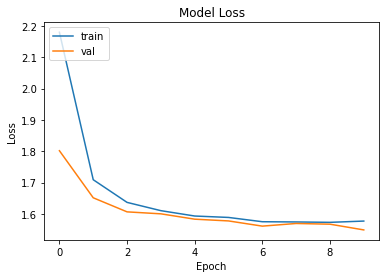

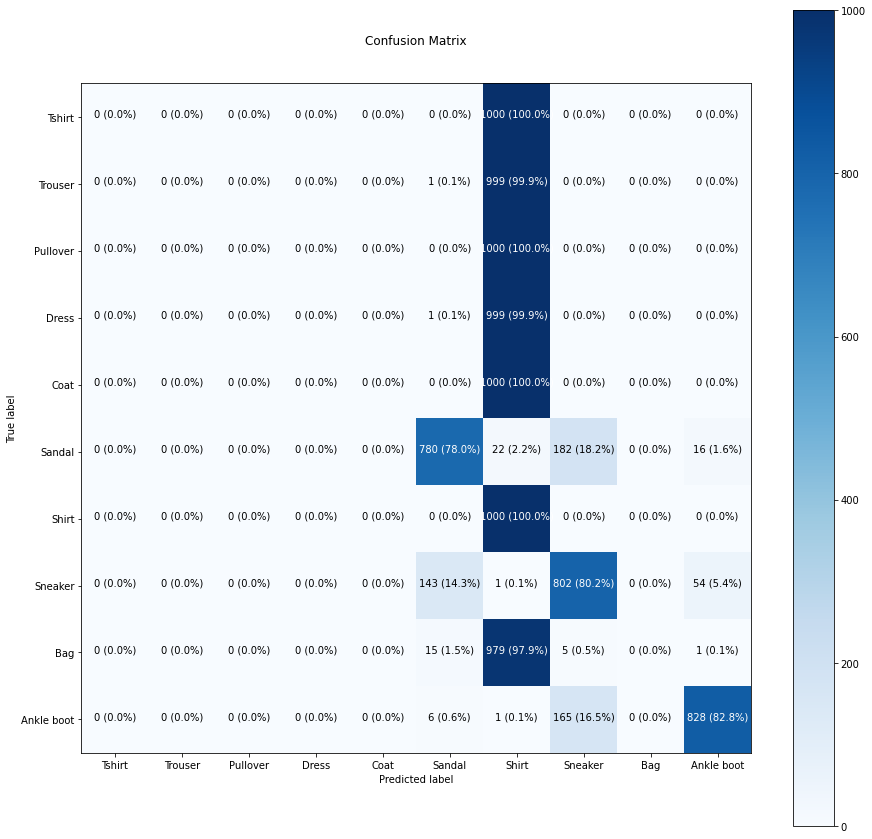

In [9]:
# Evaluate the model
model_1.evaluate(test_data, test_labels)

# Predict Data on test_data_norm
y_preds_new = model_1.predict(test_data)
y_preds_new = tf.argmax(y_preds_new, axis=1)

# Plot loss vs accuracy curves
plot_loss_curves(history_1)

# plot confusion matrix
make_confusion_matrix(test_labels, y_preds_new, class_names, (15, 15), 10)

In [10]:
# Normalise the Input dataset
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [15]:
# Model 2 (Using the normalised data)
# set random seed
tf.random.set_seed(42)
    
# Define model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name="fashion_mnist_model_2")

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data_norm, train_labels, epochs=10,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.5658 - accuracy: 0.8014


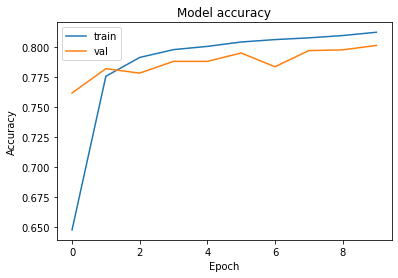

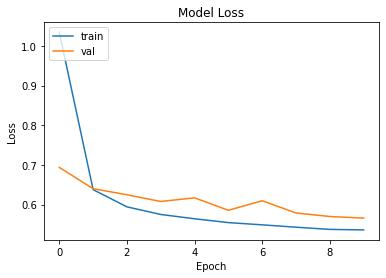

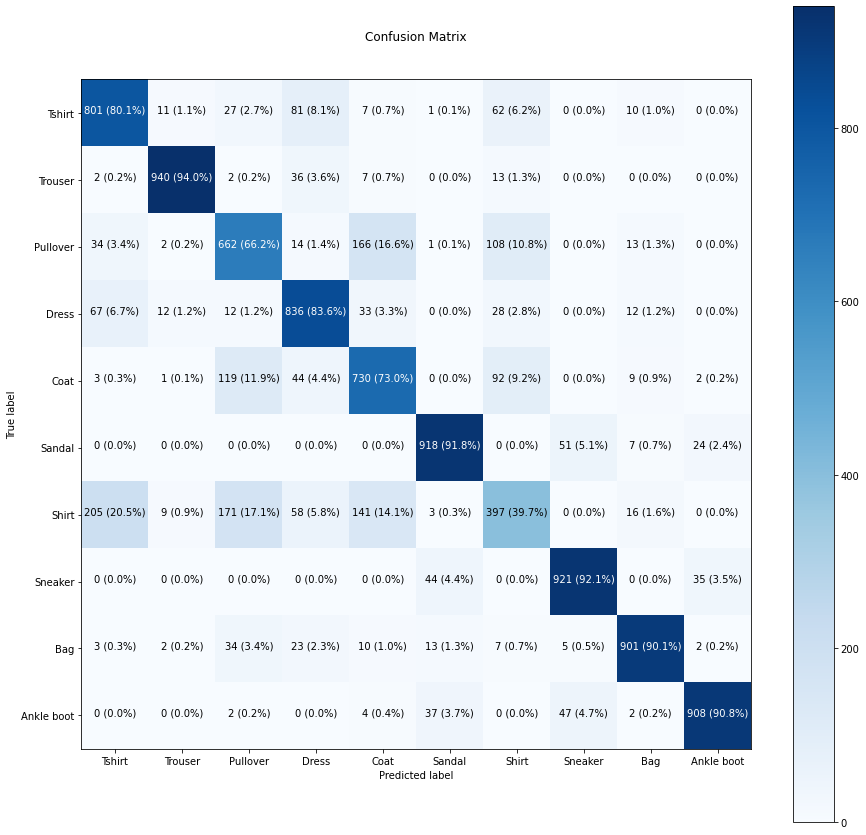

In [16]:
# Evaluate the model
model_2.evaluate(test_data_norm, test_labels)

# Predict Data on test_data_norm
y_preds_new = model_2.predict(test_data_norm)
y_preds_new = tf.argmax(y_preds_new, axis=1)

# Plot loss vs accuracy curves
plot_loss_curves(history_2)

# plot confusion matrix
make_confusion_matrix(test_labels, y_preds_new, class_names, (15, 15), 10)

In [17]:
# Model 3 playing with Learning rate
# set random seed
tf.random.set_seed(42)
    
# Define model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name="fashion_mnist_model_3")

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data_norm, train_labels, epochs=10,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0991 - accuracy: 0.5714 - val_loss: 0.9693 - val_accuracy: 0.6478
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8667 - accuracy: 0.6924 - val_loss: 0.8411 - val_accuracy: 0.7120
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8372 - accuracy: 0.7011 - val_loss: 0.8128 - val_accuracy: 0.7123
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8262 - accuracy: 0.7057 - val_loss: 0.8263 - val_accuracy: 0.7044
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8204 - accuracy: 0.7060 - val_loss: 0.9406 - val_accuracy: 0.6550
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8149 - accuracy: 0.7087 - val_loss: 0.8014 - val_accuracy: 0.7127
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8044 - accuracy: 0.7096 - val_loss: 0.9450 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.7860 - accuracy: 0.7208


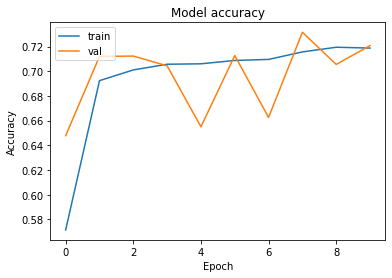

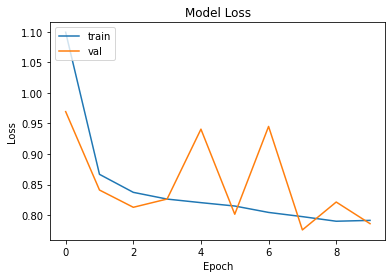

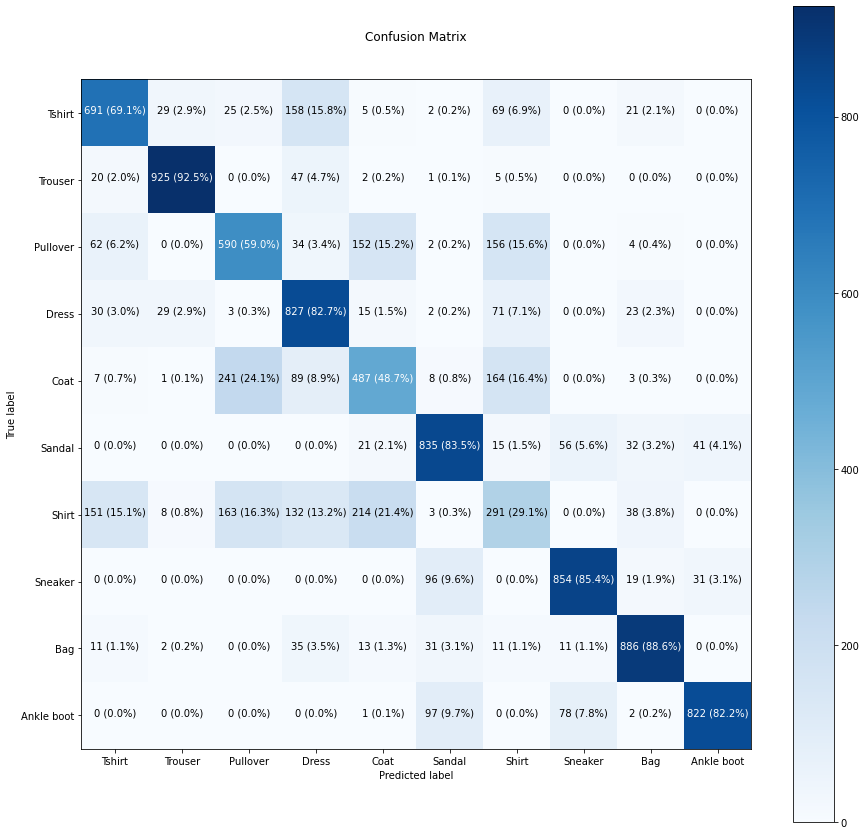

In [18]:
# Evaluate the model
model_3.evaluate(test_data_norm, test_labels)

# Predict Data on test_data_norm
y_preds_new = model_3.predict(test_data_norm)
y_preds_new = tf.argmax(y_preds_new, axis=1)

# Plot loss vs accuracy curves
plot_loss_curves(history_3)

# plot confusion matrix
make_confusion_matrix(test_labels, y_preds_new, class_names, (15, 15), 10)

In [20]:
# Model 4 : increase the number of epochs and make the hidder units as 10 in the model
# set random seed
tf.random.set_seed(42)
    
# Define model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name="fashion_mnist_model_4")

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data_norm, train_labels, epochs=20,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7175 - accuracy: 0.7461 - val_loss: 0.5048 - val_accuracy: 0.8237
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4600 - accuracy: 0.8387 - val_loss: 0.5208 - val_accuracy: 0.8253
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4300 - accuracy: 0.8481 - val_loss: 0.4625 - val_accuracy: 0.8366
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4134 - accuracy: 0.8551 - val_loss: 0.4497 - val_accuracy: 0.8394
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4029 - accuracy: 0.8580 - val_loss: 0.4701 - val_accuracy: 0.8359
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3948 - accuracy: 0.8602 - val_loss: 0.4585 - val_accuracy: 0.8366
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3883 - accuracy: 0.8632 - val_loss: 0.4507 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.4055 - accuracy: 0.8548


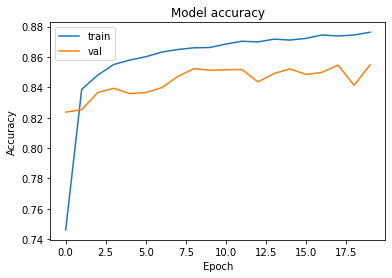

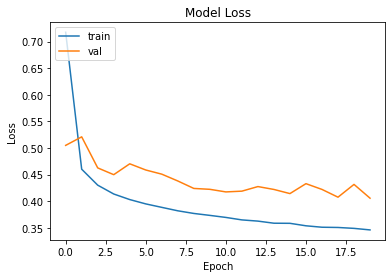

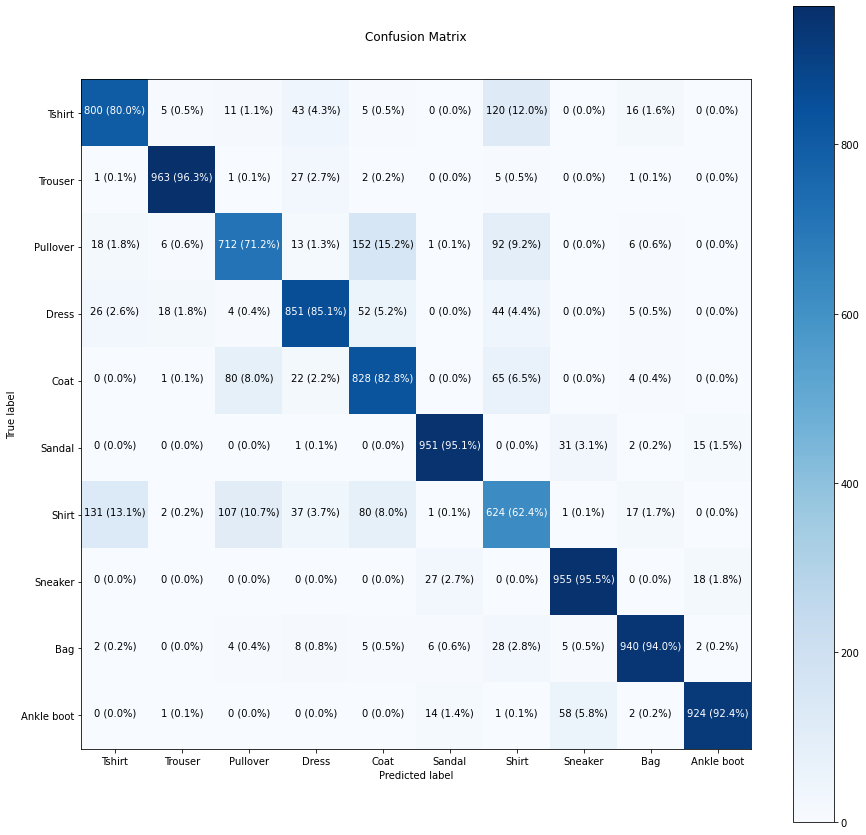

In [21]:
# Evaluate the model
model_4.evaluate(test_data_norm, test_labels)

# Predict Data on test_data_norm
y_preds_new = model_4.predict(test_data_norm)
y_preds_new = tf.argmax(y_preds_new, axis=1)

# Plot loss vs accuracy curves
plot_loss_curves(history_4)

# plot confusion matrix
make_confusion_matrix(test_labels, y_preds_new, class_names, (15, 15), 10)